<a id='home'></a>
## purpose

Answer Q2 and Q3 of the manuscript:

    Q2 How does the format of evaluation data affect performance?
    Q3 How does the format of the training data affect model performance?

### outline

1. [load results](#res)
1. [compare *GO<sub>geno,ind</sub>* to *GO<sub>AF,pop</sub>*](#genoindafpop)
1. [compare *GO<sub>geno,ind</sub>* to *GO<sub>geno,pop</sub>*](#genoindgenopop)
1. [compare *GO<sub>geno,pop</sub>* to *GO<sub>AF,pop</sub>*](#genopopafpop)

In [1]:
from pythonimports import *
import myfigs as mf

import MVP_summary_functions as mvp
import runtime_API as rt

import seaborn as sns

fig_dir = makedir(f'{rt.resdir}/figures/01_Q2_effect_of_genetic_source')

t0 = dt.now()  # notebook timer

rt.latest_commit()
session_info.show()

#########################################################
Today:	September 19, 2024 - 15:38:39 EDT
python version: 3.8.5
conda env: mvp_env

Current commit of pythonimports:
commit 6a767410e7b569adbf9df526de108f22ef50aad8  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Wed Mar 6 13:42:13 2024 -0700

Current commit of MVP_offsets:
commit 5ce82f4d655645237a0f4026fa32e220226dc373  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Thu May 16 13:02:58 2024 -0400

Current commit of MVP_runtime:
commit df87dd2c708ac0fdeebcfaaca239473ca2c487af  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Tue Mar 19 16:17:46 2024 -0400
#########################################################



In [2]:
fig_dir

'/work/lotterhos/brandon/runtime/figures/01_Q2_effect_of_genetic_source'

# get results

In [3]:
results = rt.load_results(ignore_20k=True)

results

removing records for models using 20k loci
ind shape = (162000, 17)
pooled shape = (162000, 17)
Function `load_results` completed after : 0-00:00:34


,garden,score,final_LA,glevel,plevel,pleio,slevel,landscape,popsize,migration,simulation_level,rep,num_loci,seed,demography,source,offset_level,seed_garden,final_la_bin
1231109_1_500,1,-0.561309,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,0-225,500,1231109,N-cline-center-to-edge_m-constant,ind,highly-polygenic_2-trait_no pleiotropy_equal-S...,1231109_1,0.42 < LA ≤ 0.58
1231109_2_500,2,-0.621278,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,0-225,500,1231109,N-cline-center-to-edge_m-constant,ind,highly-polygenic_2-trait_no pleiotropy_equal-S...,1231109_2,0.42 < LA ≤ 0.58
1231109_3_500,3,-0.681061,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,0-225,500,1231109,N-cline-center-to-edge_m-constant,ind,highly-polygenic_2-trait_no pleiotropy_equal-S...,1231109_3,0.42 < LA ≤ 0.58
1231109_4_500,4,-0.728768,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,0-225,500,1231109,N-cline-center-to-edge_m-constant,ind,highly-polygenic_2-trait_no pleiotropy_equal-S...,1231109_4,0.42 < LA ≤ 0.58
1231109_5_500,5,-0.755431,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,0-225,500,1231109,N-cline-center-to-edge_m-constant,ind,highly-polygenic_2-trait_no pleiotropy_equal-S...,1231109_5,0.42 < LA ≤ 0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231768_96_10000,96,-0.322035,0.382113,oligogenic,2-trait,pleiotropy,unequal-S,SS-Mtn,N-variable,m-variable,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,450-675,10000,1231768,N-variable_m-variable,pooled,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,1231768_96,0.27 < LA ≤ 0.42
1231768_97_10000,97,-0.311476,0.382113,oligogenic,2-trait,pleiotropy,unequal-S,SS-Mtn,N-variable,m-variable,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,450-675,10000,1231768,N-variable_m-variable,pooled,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,1231768_97,0.27 < LA ≤ 0.42
1231768_98_10000,98,-0.297263,0.382113,oligogenic,2-trait,pleiotropy,unequal-S,SS-Mtn,N-variable,m-variable,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,450-675,10000,1231768,N-variable_m-variable,pooled,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,1231768_98,0.27 < LA ≤ 0.42
1231768_99_10000,99,-0.316349,0.382113,oligogenic,2-trait,pleiotropy,unequal-S,SS-Mtn,N-variable,m-variable,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,450-675,10000,1231768,N-variable_m-variable,pooled,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,1231768_99,0.27 < LA ≤ 0.42


In [4]:
for source in ['ind', 'pooled']:
    print(source, results[results.source == source].offset_level.unique().__len__())

ind 162000
pooled 162000


In [5]:
540 * 3 * 100

162000

In [6]:
results.seed.unique().__len__() == 180 * 3

True

In [7]:
results.index.value_counts().value_counts()

2    162000
dtype: int64

In [8]:
results.num_loci.value_counts()

500      108000
5000     108000
10000    108000
Name: num_loci, dtype: int64

<a id='genoindafpop'></a>
# compare *GO<sub>geno,ind</sub>* to *GO<sub>AF,pop</sub>*

[top](#home)

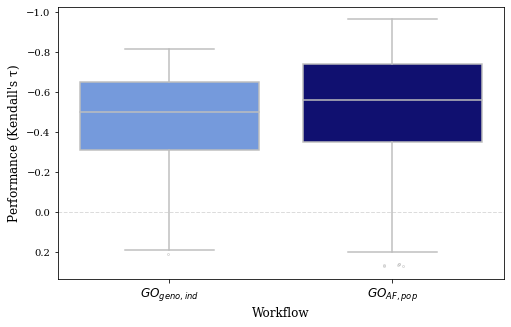

In [9]:
g = sns.boxplot(
    data=results,
    y='score',
    x='source',
    order=rt.hue_order['source'],
    **rt.boxplot_kwargs
)

mvp.jitter_fliers(axes=[g.axes])

g.axes.invert_yaxis()

mvp.update_ticklabels(g.axes, fontsize=12)

g.axes.set_xlabel(rt.factor_names['source'], fontsize=12)

g.axes.set_ylabel("Performance (Kendall's $\\tau$)", fontsize=12)

g.axes.axhline(0, **rt.hline_kwargs)

g.figure.set_size_inches(8, 5)

In [10]:
??mf.scatter2d

Saved to:  /work/lotterhos/brandon/runtime/figures/01_Q2_effect_of_genetic_source/geno-ind_af-pop_scatter2d.pdf


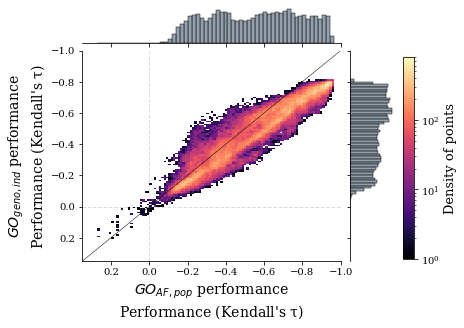

In [11]:
y = results[results.source == 'ind'].copy()
x = results[results.source == 'pooled'].copy()

x.index = x.offset_level.tolist()
y.index = y.offset_level.tolist()

x = x.loc[y.index]

axes = mf.scatter2d(
    x=x.score,
    y=y.score,
    cmap='magma',
    marginal_kws={'color' : 'slategray'},
    vlim=(1, 800)
)

ax = axes.ax_joint

ax.axes.set_xlim((-1, 0.35))

mf.draw_xy(ax)

ax.invert_yaxis()
ax.invert_xaxis()

ax.axhline(0, **rt.hline_kwargs)
ax.axvline(0, **rt.hline_kwargs)

ax.set_xlabel(f"{rt.factor_names['pooled']} performance\n{rt.perf_label}", fontsize=14)
ax.set_ylabel(f"{rt.factor_names['ind']} performance\n{rt.perf_label}", fontsize=14)

ax.set_title(None)

mf.save_pdf(f'{fig_dir}/geno-ind_af-pop_scatter2d.pdf')

plt.show()

### performance by hue by num_loci

500
Saved to:  /work/lotterhos/brandon/runtime/figures/01_Q2_effect_of_genetic_source/500_performance_by_landscape.pdf


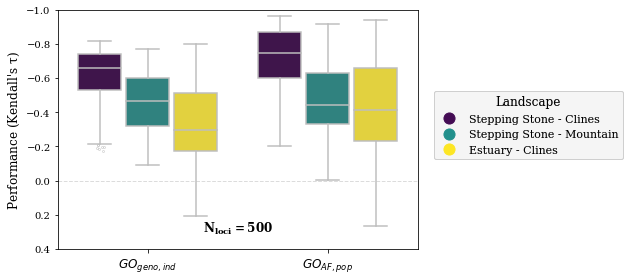

5000
Saved to:  /work/lotterhos/brandon/runtime/figures/01_Q2_effect_of_genetic_source/5000_performance_by_landscape.pdf


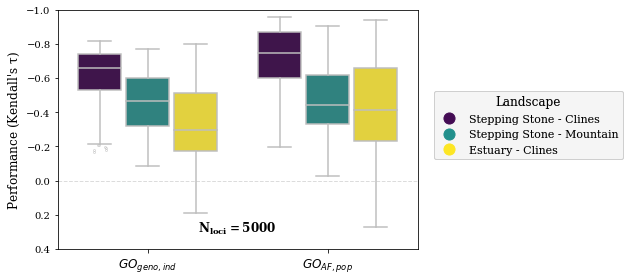

10000
Saved to:  /work/lotterhos/brandon/runtime/figures/01_Q2_effect_of_genetic_source/10000_performance_by_landscape.pdf


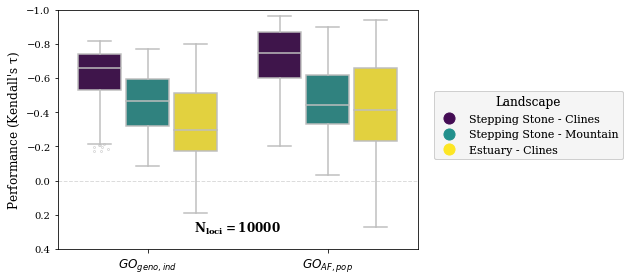

In [12]:
for num_loci in results.num_loci.unique():
    print(ColorText(str(num_loci)).bold())
    
    data = results[results.num_loci == num_loci].copy()

    for hue in rt.hue_order:
        if hue in ['marker_set', 'noncausal_env', 'program', 'demography', 'num_loci']:
            continue
        
        g = sns.boxplot(
            data=data,
            y='score',
            x='source',
            hue=hue,
            hue_order=rt.hue_order[hue],
            **rt.boxplot_kwargs
        )

        g.legend_.remove()

        g.axes.set_ylim(*rt.ylim)

        g.axes.set_xlabel(None)

        g.axes.set_ylabel(rt.perf_label, fontsize=12)
        
        xlabels = [rt.factor_names[label.get_text()] for label in g.axes.get_xticklabels()]
        g.axes.set_xticklabels(xlabels, fontsize=12)

        g.axes.axhline(0, **rt.hline_kwargs)
        
        g.axes.text(0.5, 0.3, '$N_{loci} = %s$' % num_loci, fontsize=12, weight='bold', ha='center')

        mf.adjust_box_widths(g)

        mvp.jitter_fliers(axes=[g.axes])

        rt.add_legend(g.figure, color_by=hue, loc='center left', bbox_to_anchor=(1, 0.55))

        plt.tight_layout()

        mf.save_pdf(f'{fig_dir}/{num_loci}_performance_by_{hue}.pdf')

        plt.show()
        break

### 1:1 performance comparisons between source by num_loci

In [13]:
for source in ['ind', 'pooled']:
    df = results[results.source == source].copy()
    print(source, luni(df.offset_level), nrow(df))

ind 162000 162000
pooled 162000 162000


In [14]:
luni(results.offset_level)

162000

500
len(intersets) = 54000
Pearson's r = 0.9492
Spearman's rho = 0.9509
Saved to:  /work/lotterhos/brandon/runtime/figures/01_Q2_effect_of_genetic_source/500_ind_pop_scatter.pdf


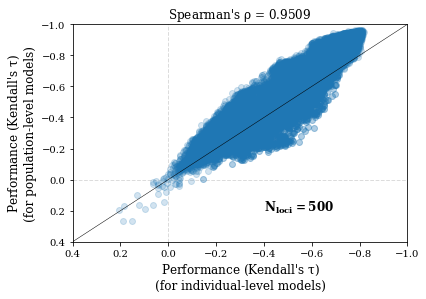

5000
len(intersets) = 54000
Pearson's r = 0.9494
Spearman's rho = 0.9511
Saved to:  /work/lotterhos/brandon/runtime/figures/01_Q2_effect_of_genetic_source/5000_ind_pop_scatter.pdf


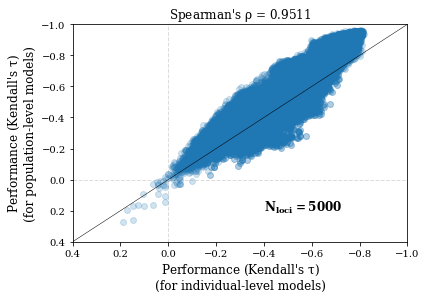

10000
len(intersets) = 54000
Pearson's r = 0.9493
Spearman's rho = 0.951
Saved to:  /work/lotterhos/brandon/runtime/figures/01_Q2_effect_of_genetic_source/10000_ind_pop_scatter.pdf


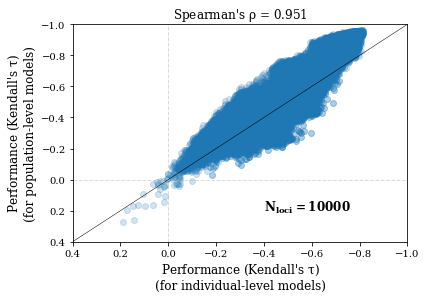

In [15]:
for num_loci in results.num_loci.unique():
    print(ColorText(str(num_loci)).bold())
    
    data = results[results.num_loci == num_loci].copy()
    data.index = data.seed_garden.tolist()
    
    # pairwise comparisons between sources
    idata = data[data.source == 'ind'].copy()
    jdata = data[data.source == 'pooled'].copy()

    # get intersecting datasets (to handle early stages where not all runs have completed)
    idata.index = idata.seed_garden.tolist()
    jdata.index = jdata.seed_garden.tolist()
    intersets = set(idata.seed_garden).intersection(jdata.seed_garden)
    print(f'{len(intersets) = }')

    # sort values in dataframe
    idata = idata.loc[intersets].sort_values(by=['seed', 'garden'])  # two sorts avoid issue with leading zero: 1 vs 10 vs 100
    jdata = jdata.loc[intersets].sort_values(by=['seed', 'garden'])

    # calculate correlation
    for method in ['pearson', 'spearman']:  # Spearman MUST BE LAST FOR TITLE BELOW!
        corr = idata.score.corr(jdata.score, method=method)
        print(f"{method.capitalize()}'s %s = %s" % ('rho' if method == 'spearman' else 'r', round(corr, 4)))

    # create scatter plot
    ax = plt.scatter(idata.score, jdata.score, alpha=0.2)
    mf.draw_xy(ax=ax.axes, lims=rt.ylim)
    ax.axes.set_xlabel(f'{rt.perf_label}\n(for individual-level models)', fontsize=12)
    ax.axes.set_ylabel(f'{rt.perf_label}\n(for population-level models)', fontsize=12)
    ax.axes.axhline(0, **rt.hline_kwargs)
    ax.axes.axvline(0, **rt.hline_kwargs)
    ax.axes.set_title("Spearman's $\\rho$ = %s" % round(corr, 4), fontsize=12)
    ax.axes.text(-0.4, 0.2, '$N_{loci} = %s$' % num_loci, fontsize=12, weight='bold')

    mf.save_pdf(f'{fig_dir}/{num_loci}_ind_pop_scatter.pdf')

    plt.show()

500
Pearson's r = 0.9468
Spearman's rho = 0.9342


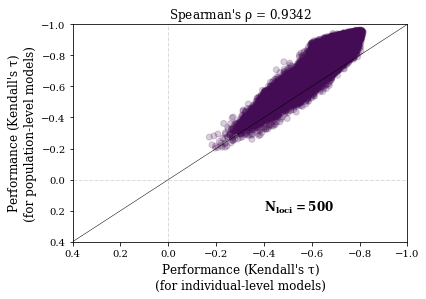

Pearson's r = 0.9095
Spearman's rho = 0.9016


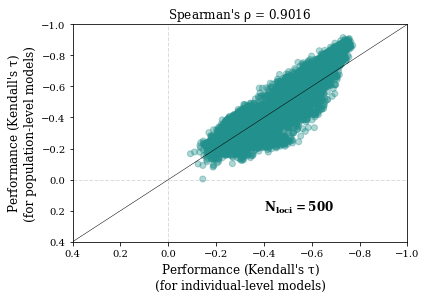

Pearson's r = 0.9801
Spearman's rho = 0.9762


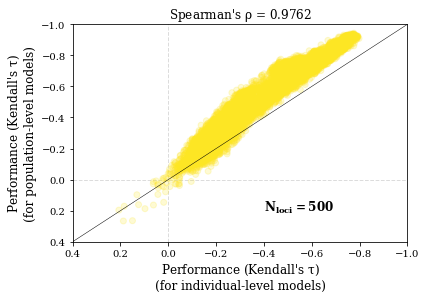

Pearson's r = 0.9208
Spearman's rho = 0.8977


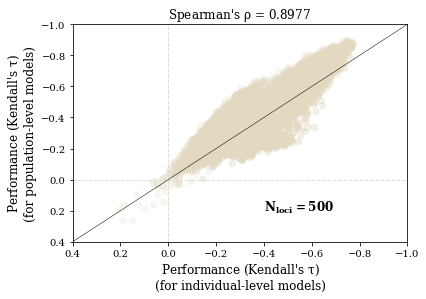

Pearson's r = 0.9031
Spearman's rho = 0.9077


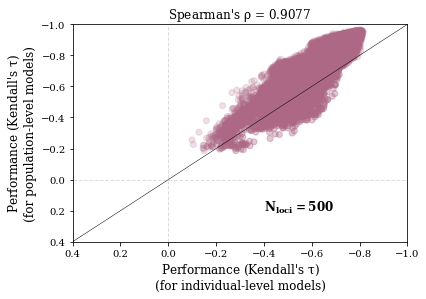

Pearson's r = 0.9452
Spearman's rho = 0.947


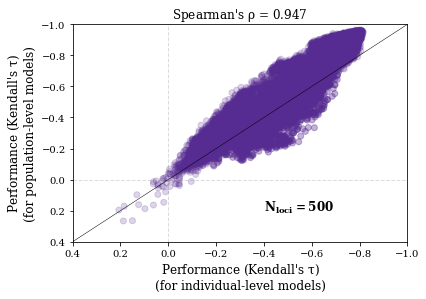

Pearson's r = 0.9571
Spearman's rho = 0.958


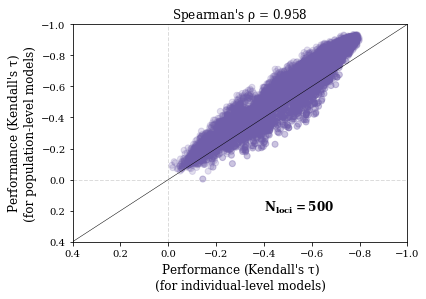

Pearson's r = 0.9518
Spearman's rho = 0.9466


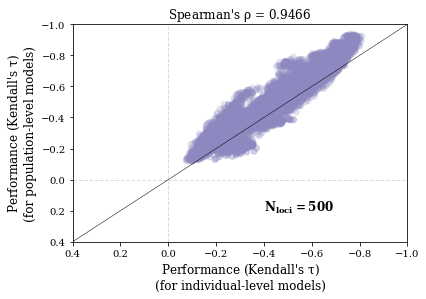

5000
Pearson's r = 0.9474
Spearman's rho = 0.9357


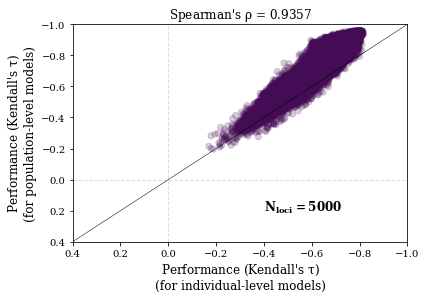

Pearson's r = 0.9105
Spearman's rho = 0.901


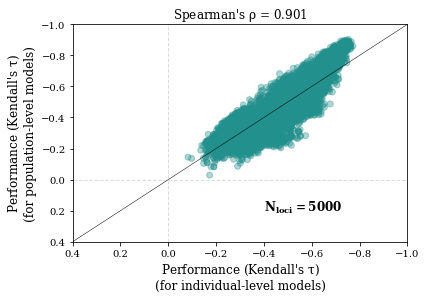

Pearson's r = 0.9802
Spearman's rho = 0.9764


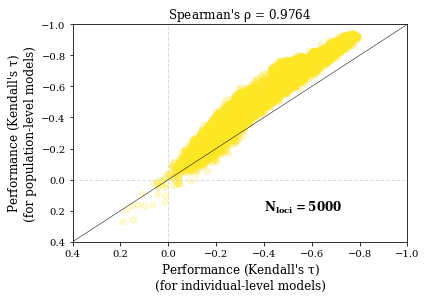

Pearson's r = 0.9215
Spearman's rho = 0.8974


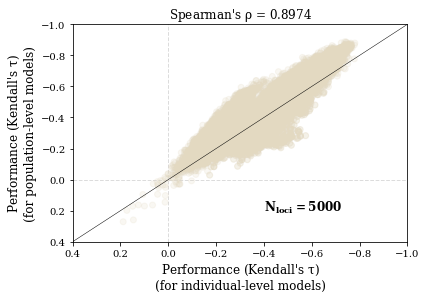

Pearson's r = 0.903
Spearman's rho = 0.9074


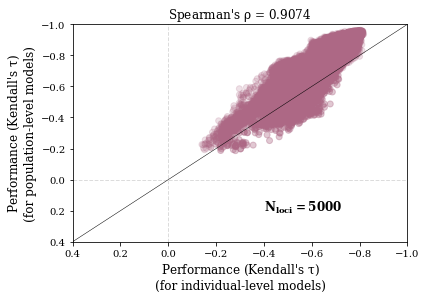

Pearson's r = 0.9456
Spearman's rho = 0.9471


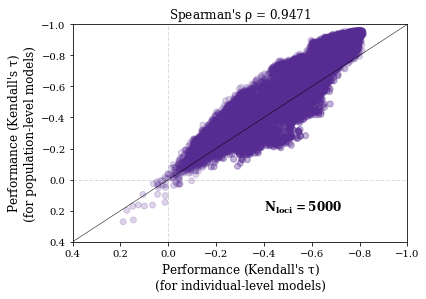

Pearson's r = 0.9578
Spearman's rho = 0.9582


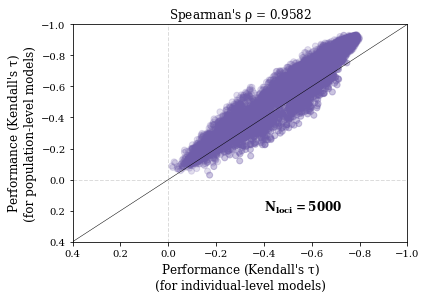

Pearson's r = 0.9509
Spearman's rho = 0.9452


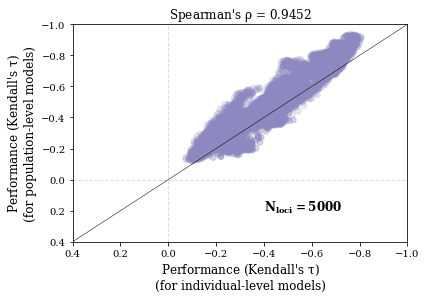

10000
Pearson's r = 0.9469
Spearman's rho = 0.9353


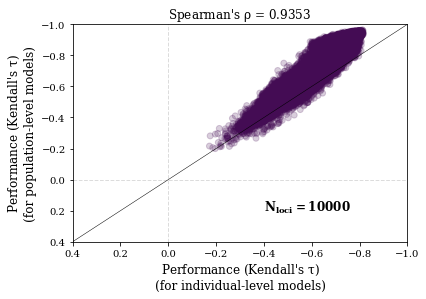

Pearson's r = 0.9105
Spearman's rho = 0.901


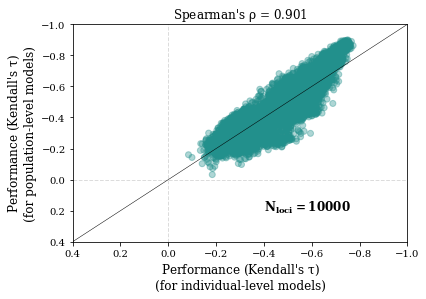

Pearson's r = 0.9802
Spearman's rho = 0.9764


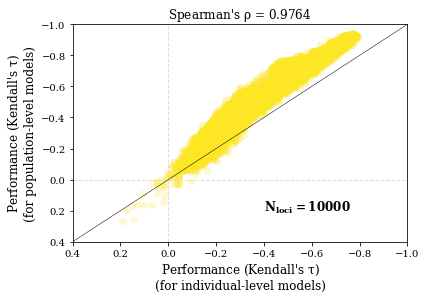

Pearson's r = 0.9214
Spearman's rho = 0.8973


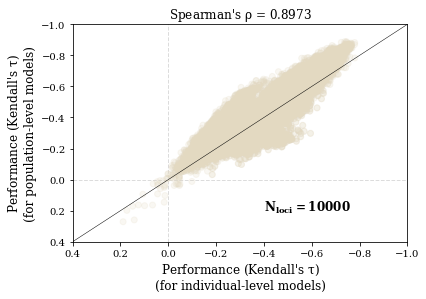

Pearson's r = 0.9031
Spearman's rho = 0.9078


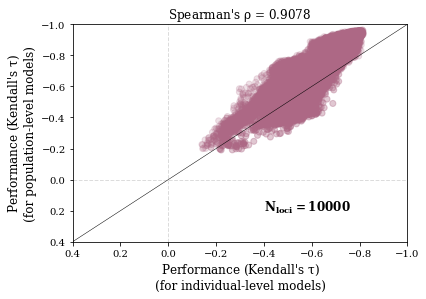

Pearson's r = 0.9456
Spearman's rho = 0.9472


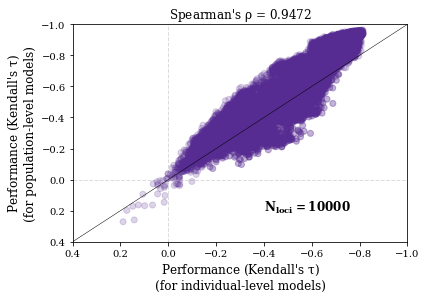

Pearson's r = 0.9576
Spearman's rho = 0.9584


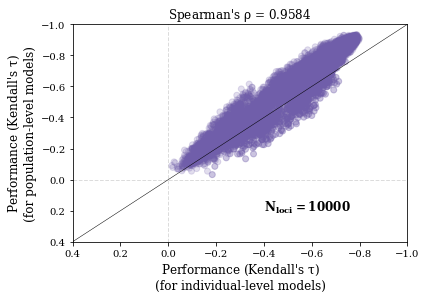

Pearson's r = 0.9508
Spearman's rho = 0.945


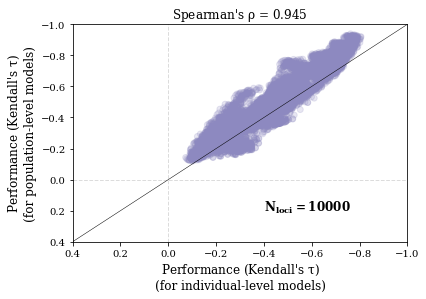

In [16]:
for num_loci in results.num_loci.unique():
    print(ColorText(str(num_loci)).bold())
    
    data = results[results.num_loci == num_loci].copy()
    
    # pairwise comparisons between sources
    i_data = data[data.source == 'ind'].copy()
    j_data = data[data.source == 'pooled'].copy()

    for hue in ['landscape', 'final_la_bin', 'migration']:
        for subhue in mvp.hue_order[hue]:
            idata = i_data[i_data[hue]==subhue].copy()
            jdata = j_data[j_data[hue]==subhue].copy()

            # get intersecting datasets (to handle early stages where not all runs have completed)
            idata.index = idata.seed_garden.tolist()
            jdata.index = jdata.seed_garden.tolist()
            intersets = set(idata.seed_garden).intersection(jdata.seed_garden)

            # sort values in dataframe
            idata = idata.loc[intersets].sort_values(by=['seed', 'garden'])  # two sorts avoid issue with leading zero: 1 vs 10 vs 100
            jdata = jdata.loc[intersets].sort_values(by=['seed', 'garden'])

            # calculate correlation
            for method in ['pearson', 'spearman']:  # Spearman MUST BE LAST FOR TITLE BELOW!
                corr = idata.score.corr(jdata.score, method=method)
                print(f"{method.capitalize()}'s %s = %s" % ('rho' if method == 'spearman' else 'r', round(corr, 4)))

            # create scatter plot
            ax = plt.scatter(idata.score, jdata.score, alpha=0.2, c=idata[hue].map(mvp.boxplot_kwargs['palette']))
            mf.draw_xy(ax=ax.axes, lims=rt.ylim)
            ax.axes.set_xlabel(f'{rt.perf_label}\n(for individual-level models)', fontsize=12)
            ax.axes.set_ylabel(f'{rt.perf_label}\n(for population-level models)', fontsize=12)
            ax.axes.axhline(0, **rt.hline_kwargs)
            ax.axes.axvline(0, **rt.hline_kwargs)
            ax.axes.set_title("Spearman's $\\rho$ = %s" % round(corr, 4), fontsize=12)
            ax.axes.text(-0.4, 0.2, '$N_{loci} = %s$' % num_loci, fontsize=12, weight='bold')

    #         mf.save_pdf(f'{fig_dir}/{num_loci}_ind_pop_scatter.pdf')

            plt.show()

<a id='genoindgenopop'></a>
# compare *GO<sub>geno,ind</sub>* to *GO<sub>geno,pop</sub>*

[top](#home)

### get geno_pop data

In [17]:
# created in 03_calculate_ind-averaged_performance/00_calc_ind-averaged_performance
f = f'{rt.resdir}/figures/00_show_individual_averaging/ind-averaged_results.txt'

geno_pop = pd.read_table(f, sep='\t')  # index is offset_level column

geno_pop = geno_pop[geno_pop.num_loci != 20_000]

geno_pop.index = geno_pop[['seed', 'garden', 'num_loci']].apply(lambda x: '_'.join(x.astype(str)), axis=1)

geno_pop

,garden,score,seed,num_loci,rep,final_LA,glevel,plevel,pleio,slevel,landscape,popsize,migration,simulation_level,offset_level,source
1231109_1_500,1,-0.688081,1231109,500,0-225,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,highly-polygenic_2-trait_no pleiotropy_equal-S...,ind-avg
1231109_2_500,2,-0.746263,1231109,500,0-225,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,highly-polygenic_2-trait_no pleiotropy_equal-S...,ind-avg
1231109_3_500,3,-0.806061,1231109,500,0-225,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,highly-polygenic_2-trait_no pleiotropy_equal-S...,ind-avg
1231109_4_500,4,-0.865455,1231109,500,0-225,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,highly-polygenic_2-trait_no pleiotropy_equal-S...,ind-avg
1231109_5_500,5,-0.909899,1231109,500,0-225,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,highly-polygenic_2-trait_no pleiotropy_equal-S...,ind-avg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231768_96_10000,96,-0.413000,1231768,10000,450-675,0.382113,oligogenic,2-trait,pleiotropy,unequal-S,SS-Mtn,N-variable,m-variable,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,ind-avg
1231768_97_10000,97,-0.399193,1231768,10000,450-675,0.382113,oligogenic,2-trait,pleiotropy,unequal-S,SS-Mtn,N-variable,m-variable,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,ind-avg
1231768_98_10000,98,-0.313507,1231768,10000,450-675,0.382113,oligogenic,2-trait,pleiotropy,unequal-S,SS-Mtn,N-variable,m-variable,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,ind-avg
1231768_99_10000,99,-0.343152,1231768,10000,450-675,0.382113,oligogenic,2-trait,pleiotropy,unequal-S,SS-Mtn,N-variable,m-variable,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,ind-avg


In [18]:
geno_pop.num_loci.value_counts()

500      54000
5000     54000
10000    54000
Name: num_loci, dtype: int64

In [19]:
luni(geno_pop.index)

162000

### get ind results

In [20]:
geno_ind = results[results.source == 'ind'].copy()

In [21]:
geno_ind.num_loci.value_counts()

500      54000
5000     54000
10000    54000
Name: num_loci, dtype: int64

In [22]:
luni(geno_ind.index)

162000

In [23]:
all(geno_ind.index.isin(geno_pop.index)), all(geno_pop.index.isin(geno_ind.index))

(True, True)

In [24]:
all(geno_ind.index == geno_pop.index)

True

### make figs

In [25]:
rt.perf_label

"Performance (Kendall's $\\tau$)"

Saved to:  /work/lotterhos/brandon/runtime/figures/01_Q2_effect_of_genetic_source/geno-ind_geno-pop_scatter2d.pdf


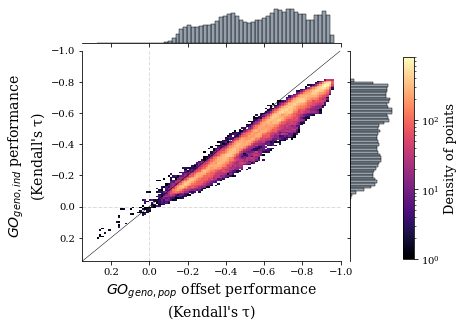

In [26]:
ax = mf.scatter2d(
    geno_pop.score,
    geno_ind.score,
    cmap='magma',
    marginal_kws={'color' : 'slategray'},
    vlim=(1, 800)
).ax_joint

ax.axes.set_xlim((-1, 0.35))

mf.draw_xy(ax)

ax.invert_yaxis()
ax.invert_xaxis()

ax.axhline(0, **rt.hline_kwargs)
ax.axvline(0, **rt.hline_kwargs)

ax.axes.set_xlabel(
    f"{rt.factor_names['ind-avg']} offset performance\n(Kendall's $\\tau$)",
    fontsize=14
)

ax.axes.set_ylabel(
    f"{rt.factor_names['ind']} performance\n(Kendall's $\\tau$)",
    fontsize=14
)

ax.set_title(None)

mf.save_pdf(f'{fig_dir}/geno-ind_geno-pop_scatter2d.pdf')

plt.show()

Saved to:  /work/lotterhos/brandon/runtime/figures/01_Q2_effect_of_genetic_source/averaged_minus_ind_hist.pdf


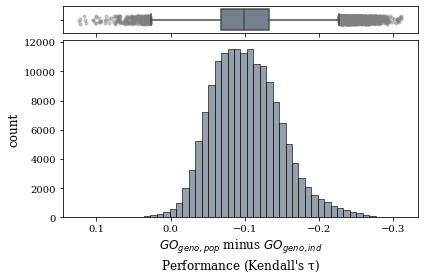

In [27]:
diffs = geno_pop.score - geno_ind.score

fig, ax = plt.subplots()

ax_box, ax_hist = mf.histo_box(diffs, histbins=50, ax=ax, histplot_kws={'color' : 'slategray'},
                              boxplot_kws={'color' : 'slategray'})

ax_hist.set_ylabel('count', fontsize=12)
ax_hist.set_xlabel(f"{rt.factor_names['ind-avg']} minus {rt.factor_names['ind']}\n{rt.perf_label}")

ax_hist.invert_xaxis()

plt.tight_layout()

mf.save_pdf(f'{fig_dir}/averaged_minus_ind_hist.pdf')

plt.show()

<a id='genopopafpop'></a>
# compare *GO<sub>AF,ind</sub>* to *GO<sub>AF,pop</sub>*

[top](#home)

In [28]:
# load AF,ind results
f = '/work/lotterhos/brandon/runtime/figures/06_af_ind_performance/af_ind_results.txt'

afind_results = pd.read_table(f)

afind_results.index = afind_results[['seed', 'garden', 'num_loci']].apply(
    lambda x: '_'.join(x.astype(str)), axis=1
)

afind_results

,garden,score,seed,num_loci,rep,final_LA,glevel,plevel,pleio,slevel,landscape,popsize,migration,simulation_level,offset_level,source
1231109_1_500,1,-0.551398,1231109,500,0-225,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,highly-polygenic_2-trait_no pleiotropy_equal-S...,"af,ind"
1231109_2_500,2,-0.611882,1231109,500,0-225,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,highly-polygenic_2-trait_no pleiotropy_equal-S...,"af,ind"
1231109_3_500,3,-0.673033,1231109,500,0-225,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,highly-polygenic_2-trait_no pleiotropy_equal-S...,"af,ind"
1231109_4_500,4,-0.723169,1231109,500,0-225,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,highly-polygenic_2-trait_no pleiotropy_equal-S...,"af,ind"
1231109_5_500,5,-0.753114,1231109,500,0-225,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,highly-polygenic_2-trait_no pleiotropy_equal-S...,"af,ind"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231768_96_20000,96,-0.266506,1231768,20000,450-675,0.382113,oligogenic,2-trait,pleiotropy,unequal-S,SS-Mtn,N-variable,m-variable,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,"af,ind"
1231768_97_20000,97,-0.203994,1231768,20000,450-675,0.382113,oligogenic,2-trait,pleiotropy,unequal-S,SS-Mtn,N-variable,m-variable,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,"af,ind"
1231768_98_20000,98,-0.222894,1231768,20000,450-675,0.382113,oligogenic,2-trait,pleiotropy,unequal-S,SS-Mtn,N-variable,m-variable,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,"af,ind"
1231768_99_20000,99,-0.267244,1231768,20000,450-675,0.382113,oligogenic,2-trait,pleiotropy,unequal-S,SS-Mtn,N-variable,m-variable,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,"af,ind"


In [29]:
# load AF,pop results (reload to get 20k runs)
afpop_results = rt.load_results(source='pooled')


afpop_results.index = afpop_results[['seed', 'garden', 'num_loci']].apply(
    lambda x: '_'.join(x.astype(str)), axis=1
)

afpop_results

keeping records for models using 20k loci
pooled shape = (216000, 17)
Function `load_results` completed after : 0-00:00:19


,garden,score,final_LA,glevel,plevel,pleio,slevel,landscape,popsize,migration,simulation_level,rep,num_loci,seed,demography,source,offset_level,seed_garden,final_la_bin
1231109_1_500,1,-0.676768,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,0-225,500,1231109,N-cline-center-to-edge_m-constant,pooled,highly-polygenic_2-trait_no pleiotropy_equal-S...,1231109_1,0.42 < LA ≤ 0.58
1231109_2_500,2,-0.735758,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,0-225,500,1231109,N-cline-center-to-edge_m-constant,pooled,highly-polygenic_2-trait_no pleiotropy_equal-S...,1231109_2,0.42 < LA ≤ 0.58
1231109_3_500,3,-0.794747,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,0-225,500,1231109,N-cline-center-to-edge_m-constant,pooled,highly-polygenic_2-trait_no pleiotropy_equal-S...,1231109_3,0.42 < LA ≤ 0.58
1231109_4_500,4,-0.856566,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,0-225,500,1231109,N-cline-center-to-edge_m-constant,pooled,highly-polygenic_2-trait_no pleiotropy_equal-S...,1231109_4,0.42 < LA ≤ 0.58
1231109_5_500,5,-0.906263,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,0-225,500,1231109,N-cline-center-to-edge_m-constant,pooled,highly-polygenic_2-trait_no pleiotropy_equal-S...,1231109_5,0.42 < LA ≤ 0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231768_96_20000,96,-0.323659,0.382113,oligogenic,2-trait,pleiotropy,unequal-S,SS-Mtn,N-variable,m-variable,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,450-675,20000,1231768,N-variable_m-variable,pooled,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,1231768_96,0.27 < LA ≤ 0.42
1231768_97_20000,97,-0.311476,0.382113,oligogenic,2-trait,pleiotropy,unequal-S,SS-Mtn,N-variable,m-variable,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,450-675,20000,1231768,N-variable_m-variable,pooled,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,1231768_97,0.27 < LA ≤ 0.42
1231768_98_20000,98,-0.297263,0.382113,oligogenic,2-trait,pleiotropy,unequal-S,SS-Mtn,N-variable,m-variable,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,450-675,20000,1231768,N-variable_m-variable,pooled,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,1231768_98,0.27 < LA ≤ 0.42
1231768_99_20000,99,-0.316349,0.382113,oligogenic,2-trait,pleiotropy,unequal-S,SS-Mtn,N-variable,m-variable,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,450-675,20000,1231768,N-variable_m-variable,pooled,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,1231768_99,0.27 < LA ≤ 0.42


In [30]:
all(afpop_results.index.isin(afind_results.index)), all(afind_results.index.isin(afpop_results.index))

(True, True)

In [31]:
afpop_results.shape, afind_results.shape

((216000, 19), (216000, 16))

Saved to:  /work/lotterhos/brandon/runtime/figures/01_Q2_effect_of_genetic_source/af-ind_af-pop_scatter2d.pdf


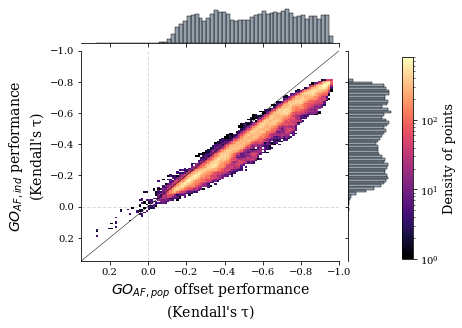

In [32]:
ax = mf.scatter2d(
    afpop_results.score,
    afind_results.score,
    cmap='magma',
    marginal_kws={'color' : 'slategray'},
    vlim=(1, 800)
).ax_joint

ax.axes.set_xlim((-1, 0.35))

mf.draw_xy(ax)

ax.invert_yaxis()
ax.invert_xaxis()

ax.axhline(0, **rt.hline_kwargs)
ax.axvline(0, **rt.hline_kwargs)

ax.axes.set_xlabel(
    f"{rt.factor_names['pooled']} offset performance\n(Kendall's $\\tau$)",
    fontsize=14
)

ax.axes.set_ylabel(
    f"{rt.factor_names['af-ind']} performance\n(Kendall's $\\tau$)",
    fontsize=14
)

ax.set_title(None)

mf.save_pdf(f'{fig_dir}/af-ind_af-pop_scatter2d.pdf')

plt.show()

<a id='genopopafpop'></a>
# compare *GO<sub>geno,pop</sub>* to *GO<sub>AF,pop</sub>*

[top](#home)

this is in 05_supplement/03_all_compare_workflows.ipynb

In [33]:
# pooled_results = results[results.source=='pooled']

# all(pooled_results.index.isin(geno_pop.index)), all(geno_pop.index.isin(pooled_results.index))

In [34]:
# ax = mf.scatter2d(
#     pooled_results.loc[geno_pop.index].score,
#     geno_pop.score,
#     cmap=plt.cm.get_cmap('plasma'),
#     marginal_kws={'color' : 'slategray'},
#     vlim=(1.0, 2093.0)
# ).ax_joint

# mf.draw_xy(ax.axes)

# ax.axes.invert_yaxis()
# ax.axes.invert_xaxis()

# ax.axes.axhline(0, **rt.hline_kwargs)
# ax.axes.axvline(0, **rt.hline_kwargs)

# ax.axes.set_title(None)

# ax.axes.set_xlabel(f"{rt.factor_names['pooled']} {rt.perf_label}")
# ax.axes.set_ylabel(f"{rt.factor_names['ind-avg']} {rt.perf_label}")

# mf.save_pdf(f'{fig_dir}/geno-pop_af-pop_2d_scatter.pdf')

In [35]:
# fig, ax = plt.subplots()

# ax_box, ax_hist = mf.histo_box(
#     geno_pop.score - pooled_results.loc[geno_pop.index].score,
#     ax=ax
# )

# ax_hist.axes.invert_xaxis()
# ax_hist.axes.set_xlabel(
#     f"{rt.factor_names['ind-avg']} minus {rt.factor_names['pooled']}\n{rt.perf_label}",
#     fontsize=13,
# )
# ax_hist.axes.set_ylabel('count', fontsize=14)

# mf.save_pdf(f'{fig_dir}/geno-pop_minus_af-pop_hist.pdf')

In [36]:
formatclock(dt.now() - t0)

'0-00:01:50'